In [46]:
import functions.q_generator as qg
import functions.data_preperation as dp
import functions.stock_corr as sc

from qiskit import QuantumCircuit

import pandas as pd

import networkx as nx
import matplotlib.pyplot as plt

# Generative Market Simulation

Generating future stock prices is a high-dimensional forecasting challenge where randomness, human behaviour and macroeconomic forces collide. Traditional statistical models struggle to capture such complexity — which is why we explore a new approach: Asset Centric Quantum Generative Simulation.

In this exeriment we show how quantum generative adversarial networks can effectively generate effective realistic stock market data. This data can be used for backmodel testing, market simulations. etc

Our novel algorithm takes an approach where stock behaviour drives the structure of the quantum circuit maximising the effectiveness of quantum computers to simulate expressive market behaviours.



# Introduction

## Market Simulation

Market simulation is the process of creating computational models that mimic the behavior of financial markets. Instead of predicting a single outcome, simulations generate multiple possible scenarios for asset prices, trading volumes, and market dynamics. These simulations help analysts, traders, and researchers to:

- Understand potential risks and market behaviors.
- Test trading strategies under diverse conditions.
- Explore the impact of economic events or policy changes.

Modern approaches often use stochastic models, agent-based systems, or generative techniques to produce realistic price paths. By simulating a variety of market scenarios, we can gain insights into volatility, correlations, and emergent patterns that are difficult to capture through historical data alone.

## Business Value of Market Simulation

Market simulation provides financial institutions with the ability to explore and analyze **possible future scenarios** without risking real capital. Improved simulation models translate directly into actionable business value:

- **Risk Management:**  
  Simulating a wide range of market conditions allows banks and asset managers to identify potential vulnerabilities, stress-test portfolios, and set capital reserves more effectively.

- **Strategy Testing:**  
  Traders can evaluate trading strategies under diverse and realistic market conditions before deploying them, reducing exposure to unexpected market events.

- **Portfolio Optimization:**  
  Generating accurate multi-asset scenarios enables better understanding of correlations and diversification benefits, leading to more robust portfolio construction.

- **Regulatory Compliance:**  
  Financial regulators often require stress tests and scenario analyses; more realistic simulations make these assessments more credible and actionable.

- **Decision Support & Forecasting:**  
  Improved models provide probabilistic insights into potential market outcomes, supporting more informed strategic and investment decisions.

- **Competitive Advantage:**  
  Firms that can model markets with higher fidelity can anticipate rare events, capture subtle correlations, and respond faster to volatility, gaining an edge over competitors relying on traditional methods.

By capturing complex stochastic behaviors and correlations that classical models often miss, advanced market simulations—especially those leveraging quantum or generative techniques—allow financial institutions to **make smarter, faster, and safer decisions** in an inherently uncertain environment.


## Limitations of Classical Methods in Capturing Market Randomness

Classical financial models, such as ARIMA, GARCH, and Monte Carlo simulations, rely on predefined statistical assumptions about market behavior. While these methods are useful for approximating trends and volatility, they often struggle to fully incorporate the inherent randomness of real-world markets. Key limitations include:

- **Simplifying assumptions:** Many classical models assume normal distributions, linear relationships, or stationary processes, which fail to capture fat tails, sudden shocks, or regime shifts.
- **Limited scenario diversity:** Classical simulations generate a constrained set of possible futures, often underestimating rare but impactful events.
- **Sequential dependencies:** Traditional methods model randomness sequentially, which may not capture complex correlations between multiple assets or market variables simultaneously.
- **Scalability issues:** Modeling a high-dimensional market with many interacting factors quickly becomes computationally expensive, limiting the granularity of randomness that can be realistically simulated.

These limitations motivate the exploration of alternative approaches, such as **quantum generative models**, which can inherently encode complex probability distributions and capture richer stochastic behavior in market simulations.

## Quantum approaches to Market Simulation

Several quantum computing techniques have been explored for market simulation, leveraging the natural probabilistic behavior of quantum systems:

- **Quantum Generative Models (QGANs, QCBMs):**  
  Variational circuits are trained to generate distributions of asset prices, capturing complex correlations and stochastic behavior beyond classical approximations.

- **Quantum Amplitude Encoding & Sampling:**  
  Market states can be encoded into quantum amplitudes, allowing efficient sampling of high-dimensional probability distributions for scenario generation.

- **Variational Quantum Algorithms for Stochastic Processes:**  
  Parameterized quantum circuits model temporal dynamics of assets, approximating stochastic processes such as Geometric Brownian Motion or jump-diffusion models.

- **Quantum Boltzmann Machines:**  
  Useful for learning joint distributions of multiple assets, enabling the generation of correlated price trajectories that reflect market dependencies.

- **Hybrid Quantum-Classical Monte Carlo:**  
  Quantum circuits provide fast sampling of probability distributions, which are combined with classical Monte Carlo methods for risk analysis and scenario simulation.

These approaches exploit quantum parallelism and entanglement to model complex market dynamics that are challenging for classical methods.

Within this notebook we explore the use of Quantum Generative Models specifically Quantum Generative Adversarial Networks on financial markets simulation.



# Classical Generative Adversarial Networks

@jaden

# Quantum Generative Adversarial Networks

Quantum Generative Adversarial Networks (QGANs) are the quantum analogue of classical GANs, designed to model complex probability distributions using quantum circuits. A typical QGAN consists of:

- **Quantum Generator:** A parameterized quantum circuit that transforms input noise into a quantum state. Measurement outcomes from this state define the generated probability distribution.
- **Discriminator:** Can be classical or quantum, trained to distinguish real data samples from those produced by the generator.

QGANs leverage the inherent **stochasticity of quantum measurements** and the **high-dimensional representational power of quantum states** to generate data distributions that are difficult to capture classically. They are particularly suitable for simulating systems with complex correlations and randomness, such as financial markets, where classical models often struggle.

By iteratively training the generator and discriminator in an adversarial manner, QGANs learn to produce increasingly realistic samples, making them a promising tool for quantum-enhanced generative modeling.


# Market-Centric Approach to QGANs

In our approach, the QGAN is specifically designed to reflect the structure of financial markets. Unlike generic QGANs, our **quantum generator leverages the correlations between stocks** to guide qubit interactions, ensuring that generated price scenarios capture realistic market dependencies. 

We also propose a unique data encoding design - which is aimed at keeping asset information on the same qubits. This prevents potentially uncorrelated data from entangling and causing additional noise within the circuit.

### Key Features

- **Correlation-Based Qubit Linkages:**  
  Qubits representing different assets are entangled based on historical correlation data. Highly correlated stocks have stronger entanglement, allowing the quantum generator to naturally model joint price movements.

- **Novel Data Encoding:**  
  We encode same asset data on the same neighboring qubits. To ensure relevent linked data is encoded where it is needed.

- **Quantum Generator Design:**  
  The parameterised quantum circuit (PQC) uses entanglement patterns informed by market relationships. Measurement outcomes correspond to simulated asset price scenarios.

- **Discriminator:**  
  A classical discriminator evaluates the realism of generated price paths, guiding the generator to produce distributions that match historical statistical properties, including volatility and cross-asset correlations.

- **Market-Aware Sampling:**  
  By encoding market structure directly into the generator, the QGAN produces scenario distributions that reflect realistic dependencies between assets, rather than treating each stock independently.

### Benefits

- Captures complex multi-asset correlations more accurately than generic QGANs.
- Produces more realistic stochastic price paths for risk analysis, portfolio optimisation, and strategy testing.  
- Integrates domain knowledge (market correlations) directly into the quantum model, bridging financial expertise and quantum generative capabilities.

**Below we demonstrate our method for encoding and the PQC.**


In [ ]:
# Demonstration of Data Loading Layer

tickers = [
    # S&P 500 (10)
    "AAPL", "MSFT", "GOOGL", "AMZN", "META", "TSLA", "NVDA", "JNJ", "V", "JPM",
    
    # Euro Stocks (5)
    "SAP.DE", "AIR.PA", "NESN.SW", "OR.PA",
    
    # FTSE 100 (5)
    "HSBA.L", "BP.L", "GSK.L", "VOD.L", "RIO.L", "LLOY.L",
    
    # Other Global Stocks (5)
    "TSM", "BABA", "SONY", "TCEHY", "TM"
]

num_tickers = len(tickers)

loading = qg.data_loading_layer(8,tickers)
loading.draw('text',fold=-1)


┌───────────────────────────────────────────────────────────────┐  
 q_0: ─┤0                                                              ├──
       │  EfficientSU2 - AAPL(AAAA,AAAB,AAAC,AAAD,AAAE,AAAF,AAAG,AAAH) │  
 q_1: ─┤1                                                              ├──
       ├───────────────────────────────────────────────────────────────┤  
 q_2: ─┤0                                                              ├──
       │  EfficientSU2 - MSFT(AAAI,AAAJ,AAAK,AAAL,AAAM,AAAN,AAAO,AAAP) │  
 q_3: ─┤1                                                              ├──
       ├───────────────────────────────────────────────────────────────┴┐ 
 q_4: ─┤0                                                               ├─
       │  EfficientSU2 - GOOGL(AAAQ,AAAR,AAAS,AAAT,AAAU,AAAV,AAAW,AAAX) │ 
 q_5: ─┤1                                                               ├─
       ├───────────────────────────────────────────────────────────────┬┘ 
 q_6: ─┤0                                                              ├──
       │  EfficientSU2 - AMZN(AAAY,AAAZ,AABA,AABB,AABC,AABD,AABE,AABF) │  
 q_7: ─┤1                                                              ├──
       ├───────────────────────────────────────────────────────────────┤  
 q_8: ─┤0                                                              ├──
       │  EfficientSU2 - META(AABG,AABH,AABI,AABJ,AABK,AABL,AABM,AABN) │  
 q_9: ─┤1                                                              ├──
       ├───────────────────────────────────────────────────────────────┤  
q_10: ─┤0                                                              ├──
       │  EfficientSU2 - TSLA(AABO,AABP,AABQ,AABR,AABS,AABT,AABU,AABV) │  
q_11: ─┤1                                                              ├──
       ├───────────────────────────────────────────────────────────────┤  
q_12: ─┤0                                                              ├──
       │  EfficientSU2 - NVDA(AABW,AABX,AABY,AABZ,AACA,AACB,AACC,AACD) │  
q_13: ─┤1                                                              ├──
       └┬──────────────────────────────────────────────────────────────┤  
q_14: ──┤0                                                             ├──
        │  EfficientSU2 - JNJ(AACE,AACF,AACG,AACH,AACI,AACJ,AACK,AACL) │  
q_15: ──┤1                                                             ├──
        └┬────────────────────────────────────────────────────────────┬┘  
q_16: ───┤0                                                           ├───
         │  EfficientSU2 - V(AACM,AACN,AACO,AACP,AACQ,AACR,AACS,AACT) │   
q_17: ───┤1                                                           ├───
        ┌┴────────────────────────────────────────────────────────────┴┐  
q_18: ──┤0                                                             ├──
        │  EfficientSU2 - JPM(AACU,AACV,AACW,AACX,AACY,AACZ,AADA,AADB) │  
q_19: ──┤1                                                             ├──
      ┌─┴──────────────────────────────────────────────────────────────┴┐ 
q_20: ┤0                                                                ├─
      │  EfficientSU2 - SAP.DE(AADC,AADD,AADE,AADF,AADG,AADH,AADI,AADJ) │ 
q_21: ┤1                                                                ├─
      ├─────────────────────────────────────────────────────────────────┤ 
q_22: ┤0                                                                ├─
      │  EfficientSU2 - AIR.PA(AADK,AADL,AADM,AADN,AADO,AADP,AADQ,AADR) │ 
q_23: ┤1                                                                ├─
      ├─────────────────────────────────────────────────────────────────┴┐
q_24: ┤0                                                                 ├
      │  EfficientSU2 - NESN.SW(AADS,AADT,AADU,AADV,AADW,AADX,AADY,AADZ) │
q_25: ┤1                                                                 ├
      └┬────────────────────────────────────────────────────────────────┬┘
q_26: ─┤0                       

In [48]:
# Single Asset Encoding Example
loading = qg.data_loading_layer(8,[tickers[0]])
loading.decompose(reps=2).draw(
    output="text",
    fold=-1,
)

┌──────────┐┌──────────┐     ┌──────────┐┌──────────┐
q_0: ┤ Ry(AAAA) ├┤ Rz(AAAC) ├──■──┤ Ry(AAAE) ├┤ Rz(AAAG) ├
     ├──────────┤├──────────┤┌─┴─┐├──────────┤├──────────┤
q_1: ┤ Ry(AAAB) ├┤ Rz(AAAD) ├┤ X ├┤ Ry(AAAF) ├┤ Rz(AAAH) ├
     └──────────┘└──────────┘└───┘└──────────┘└──────────┘

# Circuits Explanation

In the above two circuits we show how we can encode we can encode 8 data points for each asset, which are groups of 2 qubits (See second circuit). Our circuit design allows for the asset data to be encoded onto the same qubits, with no entanglement betwen qubits representing a different asset. This allows our input to be 2-qubit gate efficient while expressing the complexities of each asset data points.

As we scale this model for encoding (see circuit below) we can see the maximum 2-qubit depth remains linear with the number of qubits per ticker. This means the 2-qubit scaling with the total number of data points encoded in the entire circuit $\text{2-Qubit depth}=\text{Data points}/4$. With 4 qubits per Stock we have more room to encode previous Day/Week/Month asset price and indicator data. This will help the quantum algorithm in generating a more accurate distribution. 

Increasing the number of assets we represent scales as $\text{NumQubits}=\text{Data points per asset}\times\text{number assets}/4$. Which allows for efficient qubit scaling to represent a greater number of assets in a particular market or across more variety of markets.


In [49]:
loading = qg.data_loading_layer(32,tickers[:4])
qg.optimise_circuit_best(loading.decompose(reps = 2),trials=1)
print(f"Total Depth: {loading.decompose(reps = 2).depth()}")
loading.decompose(reps = 2).draw('text',fold=-1)




Trial 2Q Depth: 8
Total Depth: 12


┌──────────┐┌──────────┐┌───┐     ┌──────────┐┌──────────┐                                                                        
 q_0: ┤ Ry(AAAA) ├┤ Rz(AAAI) ├┤ X ├──■──┤ Ry(AAAQ) ├┤ Rz(AAAY) ├────────────────────────────────────────────────────────────────────────
      ├──────────┤├──────────┤└─┬─┘┌─┴─┐└──────────┘├──────────┤┌──────────┐                                                            
 q_1: ┤ Ry(AAAB) ├┤ Rz(AAAJ) ├──┼──┤ X ├─────■──────┤ Ry(AAAR) ├┤ Rz(AAAZ) ├────────────────────────────────────────────────────────────
      ├──────────┤├──────────┤  │  └───┘   ┌─┴─┐    └──────────┘├──────────┤┌──────────┐                                                
 q_2: ┤ Ry(AAAC) ├┤ Rz(AAAK) ├──┼──────────┤ X ├─────────■──────┤ Ry(AAAS) ├┤ Rz(AABA) ├────────────────────────────────────────────────
      ├──────────┤├──────────┤  │          └───┘       ┌─┴─┐    └──────────┘├──────────┤┌──────────┐                                    
 q_3: ┤ Ry(AAAD) ├┤ Rz(AAAL) ├──┼──────────────────────┤ X ├─────────■──────┤ Ry(AAAT) ├┤ Rz(AABB) ├────────────────────────────────────
      ├──────────┤├──────────┤  │                      └───┘       ┌─┴─┐    └──────────┘├──────────┤┌──────────┐                        
 q_4: ┤ Ry(AAAE) ├┤ Rz(AAAM) ├──┼──────────────────────────────────┤ X ├─────────■──────┤ Ry(AAAU) ├┤ Rz(AABC) ├────────────────────────
      ├──────────┤├──────────┤  │                                  └───┘       ┌─┴─┐    └──────────┘├──────────┤┌──────────┐            
 q_5: ┤ Ry(AAAF) ├┤ Rz(AAAN) ├──┼──────────────────────────────────────────────┤ X ├─────────■──────┤ Ry(AAAV) ├┤ Rz(AABD) ├────────────
      ├──────────┤├──────────┤  │                                              └───┘       ┌─┴─┐    └──────────┘├──────────┤┌──────────┐
 q_6: ┤ Ry(AAAG) ├┤ Rz(AAAO) ├──┼──────────────────────────────────────────────────────────┤ X ├─────────■──────┤ Ry(AAAW) ├┤ Rz(AABE) ├
      ├──────────┤├──────────┤  │                                                          └───┘       ┌─┴─┐    ├──────────┤├──────────┤
 q_7: ┤ Ry(AAAH) ├┤ Rz(AAAP) ├──■──────────────────────────────────────────────────────────────────────┤ X ├────┤ Ry(AAAX) ├┤ Rz(AABF) ├
      ├──────────┤├──────────┤┌───┐     ┌──────────┐┌──────────┐                                       └───┘    └──────────┘└──────────┘
 q_8: ┤ Ry(AABG) ├┤ Rz(AABO) ├┤ X ├──■──┤ Ry(AABW) ├┤ Rz(AACE) ├────────────────────────────────────────────────────────────────────────
      ├──────────┤├──────────┤└─┬─┘┌─┴─┐└──────────┘├──────────┤┌──────────┐                                                            
 q_9: ┤ Ry(AABH) ├┤ Rz(AABP) ├──┼──┤ X ├─────■──────┤ Ry(AABX) ├┤ Rz(AACF) ├────────────────────────────────────────────────────────────
      ├──────────┤├──────────┤  │  └───┘   ┌─┴─┐    └──────────┘├──────────┤┌──────────┐                                                
q_10: ┤ Ry(AABI) ├┤ Rz(AABQ) ├──┼──────────┤ X ├─────────■──────┤ Ry(AABY) ├┤ Rz(AACG) ├────────────────────────────────────────────────
      ├──────────┤├──────────┤  │          └───┘       ┌─┴─┐    └──────────┘├──────────┤┌──────────┐                                    
q_11: ┤ Ry(AABJ) ├┤ Rz(AABR) ├──┼──────────────────────┤ X ├─────────■──────┤ Ry(AABZ) ├┤ Rz(AACH) ├────────────────────────────────────
      ├──────────┤├──────────┤  │                      └───┘       ┌─┴─┐    └──────────┘├──────────┤┌──────────┐                        
q_12: ┤ Ry(AABK) ├┤ Rz(AABS) ├──┼──────────────────────────────────┤ X ├─────────■──────┤ Ry(AACA) ├┤ Rz(AACI) ├────────────────────────
      ├──────────┤├──────────┤  │                                  └───┘       ┌─┴─┐    └──────────┘├──────────┤┌──────────┐            
q_13: ┤ Ry(AABL) ├┤ Rz(AABT) ├──┼──────────────────────────────────────────────┤ X ├─────────■──────┤ Ry(AACB) ├┤ Rz(AACJ) ├────────────
      ├──────────┤├──────────┤  │                                              └───┘       ┌─┴─┐    └──────────┘├──────────┤┌──────────┐
q_14: ┤ Ry(AABM) ├┤ Rz(AABU) ├──┼

# Significance of this technique
We explained above how this new market centric data encoding approach scales efficient on qubit depth and number of qubits required, now we explain the significance of this in the financial world. 

Within markets simulation we need to represent assets or derivatives on the computers we simulate them on. This method of quantum data encoding for markets defines a clear path forward for large asset data as quantum computers scale in qubit size. Due to the compact nature of this method we can see use cases being able to model the entire S&P500 

/Users/a01milner/Documents/Schro-horse/functions/data_preperation.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  25 of 25 completed
/Users/a01milner/Documents/Schro-horse/functions/data_preperation.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[("OC_next", ticker)] = close_next - open_next
/Users/a01milner/Documents/Schro-horse/functions/data_preperation.py:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented 

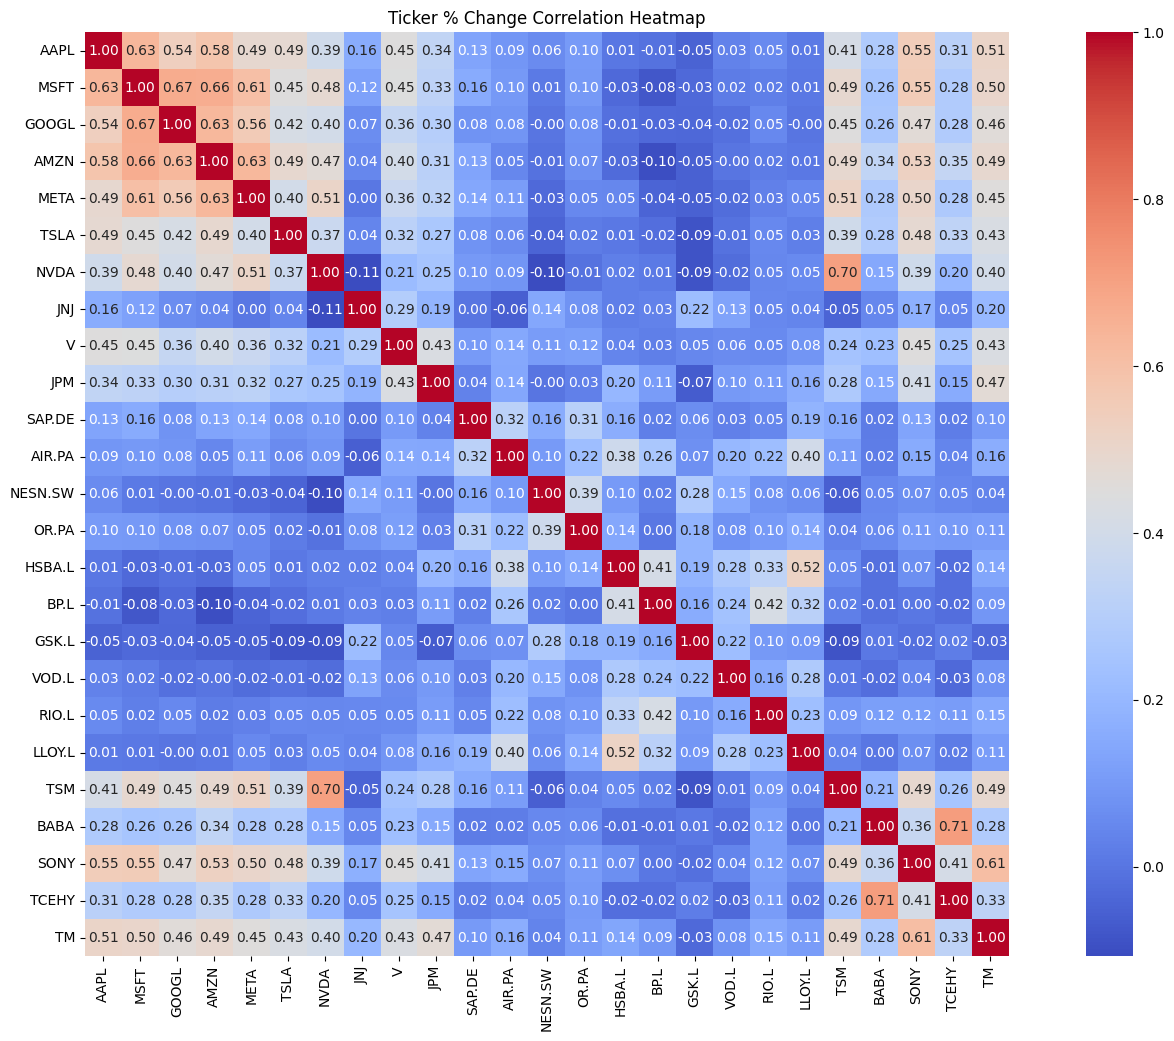

In [50]:
# Demonstration of Stock Correlation Analysis

data = dp.download_stock_data(tickers, years=5)
data.dropna()
for t in tickers:
    data = dp.add_OC_CO_next_changes(data, t)

#data = dp.remove_na(data)

dp.plot_tickers_pct_change_corr(data, tickers, title="Ticker % Change Correlation Heatmap")